# importing libraries and data

In [1]:
import pandas as pd 
from pandas import Grouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline
import re
import calendar

In [2]:
#folder shortcut
path = r'C:\Users\hp\Documents\Citi Bike'

In [3]:
#import citibike csv
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_2.csv'), index_col = False)

In [4]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   day_of_week              42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_station_id         42993 non-null  int64  
 4   start_station_name       42993 non-null  object 
 5   start_station_latitude   42993 non-null  float64
 6   start_station_longitude  42993 non-null  float64
 7   end_station_id           42993 non-null  int64  
 8   end_station_name         42993 non-null  object 
 9   end_station_latitude     42993 non-null  float64
 10  end_station_longitude    42993 non-null  float64
 11  trip_duration            42993 non-null  int64  
 12  subscriber               42993 non-null  object 
 13  birth_year               42993 non-null  float64
 14  gender                

# Cleaning needed for exploratory analysis

In [5]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           5         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [6]:
citi.dtypes

Unnamed: 0                   int64
day_of_week                 object
start_hour                   int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
start_of_ride               object
end_of_ride                 object
dtype: object

In [7]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   day_of_week              42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_station_id         42993 non-null  int64  
 4   start_station_name       42993 non-null  object 
 5   start_station_latitude   42993 non-null  float64
 6   start_station_longitude  42993 non-null  float64
 7   end_station_id           42993 non-null  int64  
 8   end_station_name         42993 non-null  object 
 9   end_station_latitude     42993 non-null  float64
 10  end_station_longitude    42993 non-null  float64
 11  trip_duration            42993 non-null  int64  
 12  subscriber               42993 non-null  object 
 13  birth_year               42993 non-null  float64
 14  gender                

In [8]:
#changing gender variables back to numeric - 0=unknown 1=male 2= female
citi['gender']=citi['gender'].replace(['Uknown','male','female'],[0,1,2])

In [9]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           5         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [10]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           5         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

In [11]:
#dropping Unnamed column
citi = citi.drop(columns = ['Unnamed: 0'])

In [12]:
citi.head()

day_of_week  start_hour  start_station_id       start_station_name  \
0         Mon          18               523          W 38 St & 8 Ave   
1         Thu          18               257  Lispenard St & Broadway   
2         Wed          19               479          9 Ave & W 45 St   
3         Sat          11               527          E 33 St & 1 Ave   
4         Fri          22               293    Lafayette St & E 8 St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               40.754666               -73.991382             334   
1               40.719392               -74.002472             236   
2               40.760193               -73.991255             513   
3               40.743156               -73.974347             441   
4               40.730287               -73.990765             432   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4    E 7 St & Avenue A             40.726218             -73.983799   

   trip_duration  subscriber  birth_year  gender        start_of_ride  \
0            993  Subscriber      1968.0       2  2013-09-09 18:18:55   
1            581  Subscriber      1983.0       1  2013-09-12 18:38:53   
2            361  Subscriber      1989.0       1  2013-09-18 19:44:04   
3            561  Subscriber      1988.0       2  2013-09-28 11:54:37   
4            427  Subscriber      1986.0       2  2013-09-27 22:01:01   

           end_of_ride  
0  2013-09-09 18:35:28  
1  2013-09-12 18:48:34  
2  2013-09-18 19:50:05  
3  2013-09-28 12:03:58  
4  2013-09-27 22:08:08

# exploring relationships

In [13]:
# make a subset 
sub=citi[['day_of_week','start_hour','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','trip_duration','subscriber','birth_year','gender']]

In [14]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_latitude   42993 non-null  float64
 4   start_station_longitude  42993 non-null  float64
 5   end_station_id           42993 non-null  int64  
 6   end_station_latitude     42993 non-null  float64
 7   end_station_longitude    42993 non-null  float64
 8   trip_duration            42993 non-null  int64  
 9   subscriber               42993 non-null  object 
 10  birth_year               42993 non-null  float64
 11  gender                   42993 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 3.9+ MB


In [15]:
# make a second subset 
sub_2=citi[['start_hour','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','trip_duration','birth_year']]

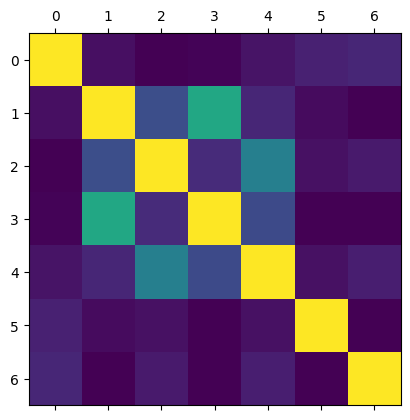

(<matplotlib.image.AxesImage at 0x139fae8cf50>, None)

In [16]:
# making a correlation heatmap using matplotlib
plt.matshow(sub_2.corr()),plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

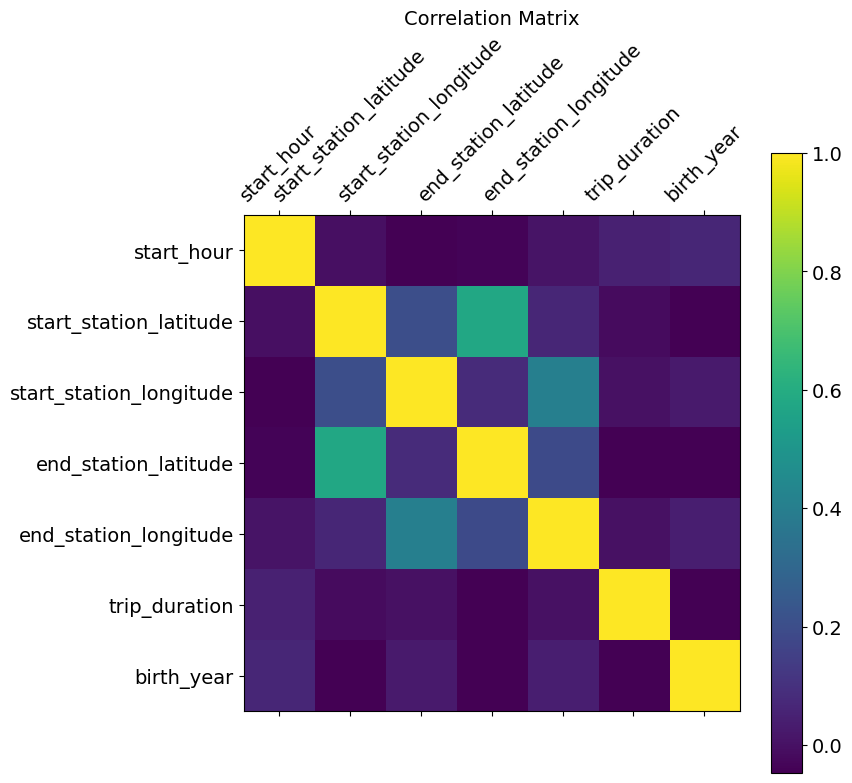

In [17]:
# add labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(sub_2.corr(), fignum=f.number)
# type of plot
plt.xticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(sub_2.shape[1]),sub_2.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Correlation Matrix',fontsize=14)
# add title

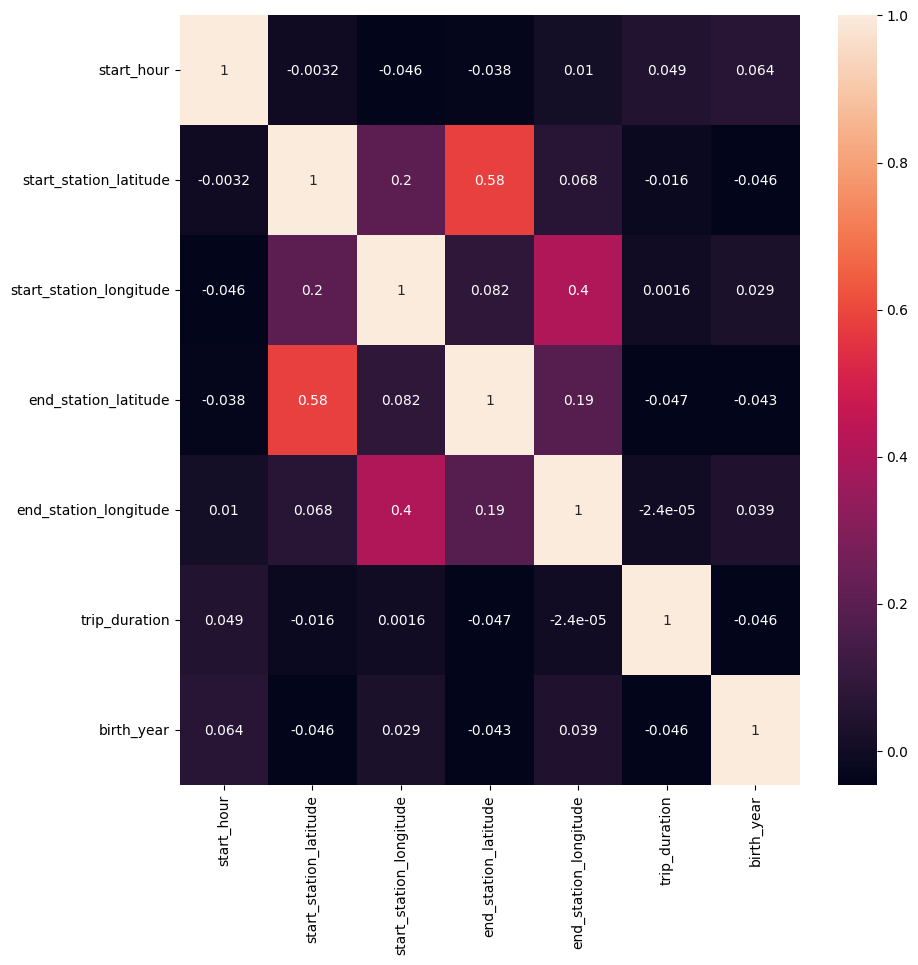

In [18]:
#subplot in matplot lib
f,ax=plt.subplots(figsize=(10,10))
#create the correlationheat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub_2.corr(), annot = True, ax=ax)

In [19]:
# make a third subset 
sub_3=citi[['start_hour','day_of_week']]

In [20]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_name       42993 non-null  object 
 4   start_station_latitude   42993 non-null  float64
 5   start_station_longitude  42993 non-null  float64
 6   end_station_id           42993 non-null  int64  
 7   end_station_name         42993 non-null  object 
 8   end_station_latitude     42993 non-null  float64
 9   end_station_longitude    42993 non-null  float64
 10  trip_duration            42993 non-null  int64  
 11  subscriber               42993 non-null  object 
 12  birth_year               42993 non-null  float64
 13  gender                   42993 non-null  int64  
 14  start_of_ride         

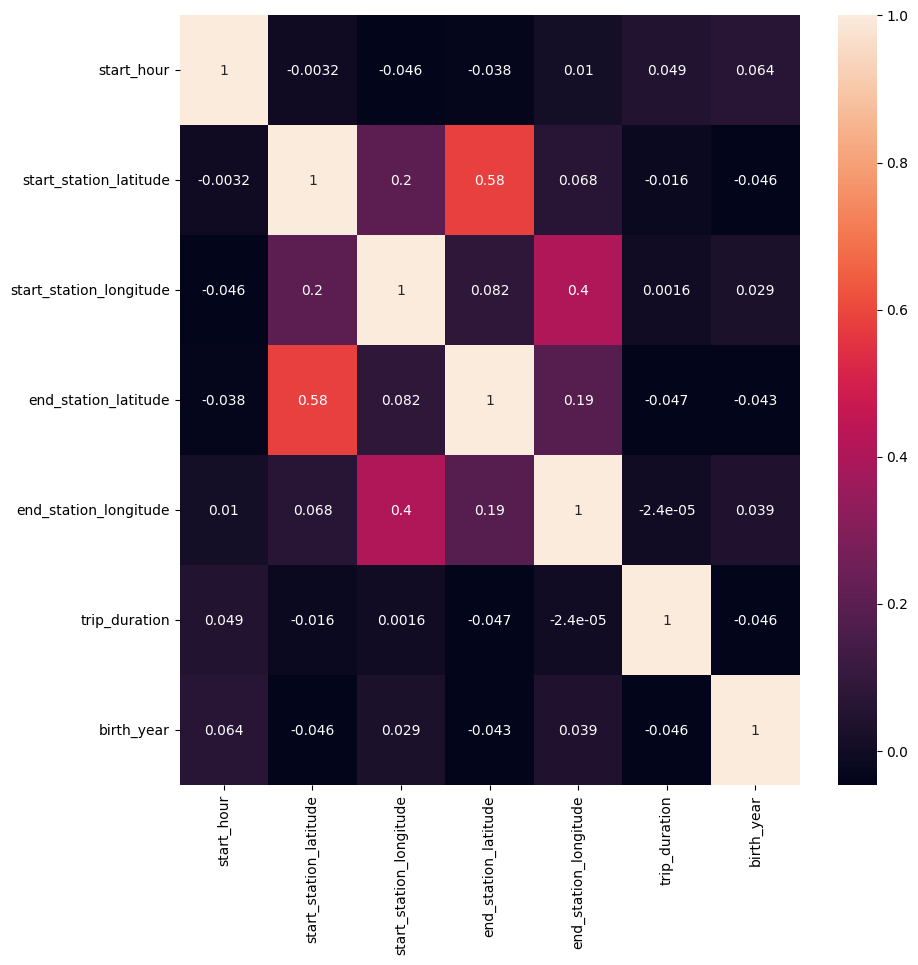

In [21]:
#subplot in matplot lib
f,ax=plt.subplots(figsize=(10,10))
#create the correlationheat map in seaborn by applying a heatmap onto the correlation matrix
corr=sns.heatmap(sub_2.corr(), annot = True, ax=ax)

# discussing the coefficients
-- I struggle to see if there is much correlation between variables in this chart
-- If I make rides in a day I would then be able to see what day is busiest and what hour is the busiest but that would be making a second sub set of data and that is not what the task is asking of me


--  becuase a correlation matrix measures quantities of some sort I would say the items with correlations that are worth investigating and have relationships that could be meaningful are: 

start hour and trip duration - do people ride longer rides in the morning or the evening? as the day goes on are people taking rides longer?
start hour and birth year  - as the day goes on are more younger people or older people riding?
trip duration and birth year - as riders get older to they ride longer or shorter?

In [22]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_name       42993 non-null  object 
 4   start_station_latitude   42993 non-null  float64
 5   start_station_longitude  42993 non-null  float64
 6   end_station_id           42993 non-null  int64  
 7   end_station_name         42993 non-null  object 
 8   end_station_latitude     42993 non-null  float64
 9   end_station_longitude    42993 non-null  float64
 10  trip_duration            42993 non-null  int64  
 11  subscriber               42993 non-null  object 
 12  birth_year               42993 non-null  float64
 13  gender                   42993 non-null  int64  
 14  start_of_ride         

In [23]:
#changing datatype to - datetime
citi['ride_start']=pd.to_datetime(citi['start_of_ride'],infer_datetime_format=True) 

C:\Users\hp\AppData\Local\Temp\ipykernel_7392\3519113408.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citi['ride_start']=pd.to_datetime(citi['start_of_ride'],infer_datetime_format=True)


In [24]:
#changing datatype to - datetime
citi['ride_end']=pd.to_datetime(citi['end_of_ride'],infer_datetime_format=True) 

C:\Users\hp\AppData\Local\Temp\ipykernel_7392\3447450850.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  citi['ride_end']=pd.to_datetime(citi['end_of_ride'],infer_datetime_format=True)


In [25]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42993 non-null  object        
 1   start_hour               42993 non-null  int64         
 2   start_station_id         42993 non-null  int64         
 3   start_station_name       42993 non-null  object        
 4   start_station_latitude   42993 non-null  float64       
 5   start_station_longitude  42993 non-null  float64       
 6   end_station_id           42993 non-null  int64         
 7   end_station_name         42993 non-null  object        
 8   end_station_latitude     42993 non-null  float64       
 9   end_station_longitude    42993 non-null  float64       
 10  trip_duration            42993 non-null  int64         
 11  subscriber               42993 non-null  object        
 12  birth_year               42993 n

In [26]:
#dropping end of ride  column
citi = citi.drop(columns = ['end_of_ride'])

In [27]:
#dropping start of ride time column
citi = citi.drop(columns = ['start_of_ride'])

In [28]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42993 non-null  object        
 1   start_hour               42993 non-null  int64         
 2   start_station_id         42993 non-null  int64         
 3   start_station_name       42993 non-null  object        
 4   start_station_latitude   42993 non-null  float64       
 5   start_station_longitude  42993 non-null  float64       
 6   end_station_id           42993 non-null  int64         
 7   end_station_name         42993 non-null  object        
 8   end_station_latitude     42993 non-null  float64       
 9   end_station_longitude    42993 non-null  float64       
 10  trip_duration            42993 non-null  int64         
 11  subscriber               42993 non-null  object        
 12  birth_year               42993 n

In [29]:
#seeing how many rides are in an hour
citi['start_hour'].value_counts(dropna=False)

start_hour
17    4398
18    4280
8     3127
16    3046
19    2930
9     2598
15    2436
13    2408
14    2401
12    2353
7     1980
20    1932
11    1841
10    1827
21    1371
22    1159
6      889
23     803
0      420
1      266
5      195
2      162
3       96
4       75
Name: count, dtype: int64

In [30]:
# Define data types for specific columns
data_types = {
    'start_time': 'datetime64',
    'end_time': 'datetime64'
}

In [31]:
#wanting to see rides per day using group function
rides_per_day=citi.groupby(citi['ride_start'].dt.date).size()

In [32]:
rides_per_day

ride_start
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
dtype: int64

In [33]:
#trying to add day of week to it
rides_per_day.index=pd.to_datetime(rides_per_day.index)

In [34]:
rides_per_day['day_of_week'] = rides_per_day.index.day_name()

In [35]:
rides_per_day

ride_start
2013-09-01 00:00:00                                                  778
2013-09-02 00:00:00                                                  743
2013-09-03 00:00:00                                                 1397
2013-09-04 00:00:00                                                 1543
2013-09-05 00:00:00                                                 1435
2013-09-06 00:00:00                                                 1522
2013-09-07 00:00:00                                                 1205
2013-09-08 00:00:00                                                 1206
2013-09-09 00:00:00                                                 1487
2013-09-10 00:00:00                                                 1646
2013-09-11 00:00:00                                                 1587
2013-09-12 00:00:00                                                 1401
2013-09-13 00:00:00                                                 1701
2013-09-14 00:00:00                     

In [36]:
#seeing how many rides were taken on each day of week 
citi['day_of_week'].value_counts(dropna=False)

day_of_week
Mon    6797
Fri    6594
Wed    6490
Tue    6429
Thu    6212
Sun    5506
Sat    4965
Name: count, dtype: int64

# discussing the coefficients
-- I struggle to see if there is much correlation between variables in this chart
-- If I make rides in a day I would then be able to see what day is busiest and what hour is the busiest but that would be making a second sub set of data and that is not what the task is asking of me


--  becuase a correlation matrix measures quantities of some sort I would say the items with correlations that are worth investigating and have relationships that could be meaningful are: 

start hour and trip duration - do people ride longer rides in the morning or the evening? as the day goes on are people taking rides longer?
start hour and birth year  - as the day goes on are more younger people or older people riding?
trip duration and birth year - as riders get older to they ride longer or shorter?

# scatter plots

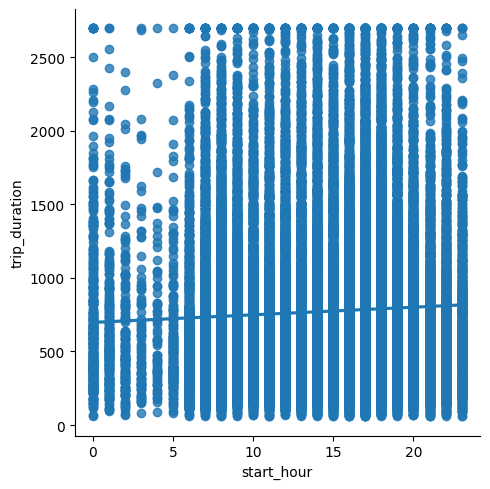

In [37]:
# create a scatterplot for the start hour and trip duration in seaborn
sns.lmplot(x='start_hour', y='trip_duration', data=citi)

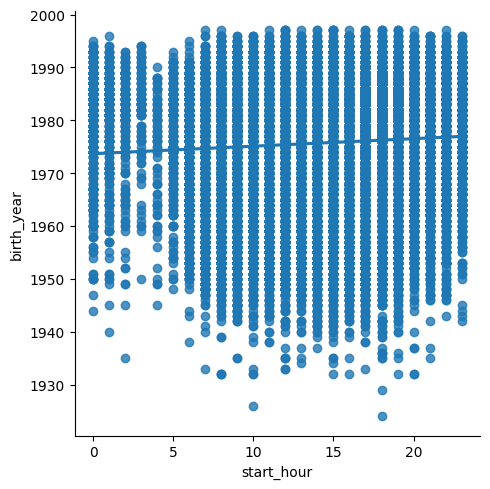

In [38]:
# create a scatterplot for the start hour and birth year in seaborn
sns.lmplot(x='start_hour', y='birth_year', data=citi)

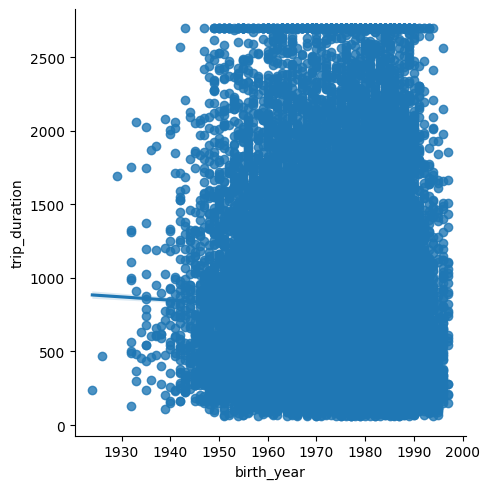

In [39]:
# create a scatterplot for the birth year and trip duration in seaborn
sns.lmplot(x='birth_year', y='trip_duration', data=citi)

# scatterplot output discussion
these scatterplots are very crowed.  It might be benefical to put them in 'bins' of somesort

in the first scatter you see that the early morning hours have less riders and then it picks up after 6am until about9pm  but there is no real correlation of these 2

on the second scatter the correlation line is slightly positive but the marks are on both sides far to much to draw any real conclusion between start hour and birth year

third scatter there is no real conclusion to be drawn


# pair plots

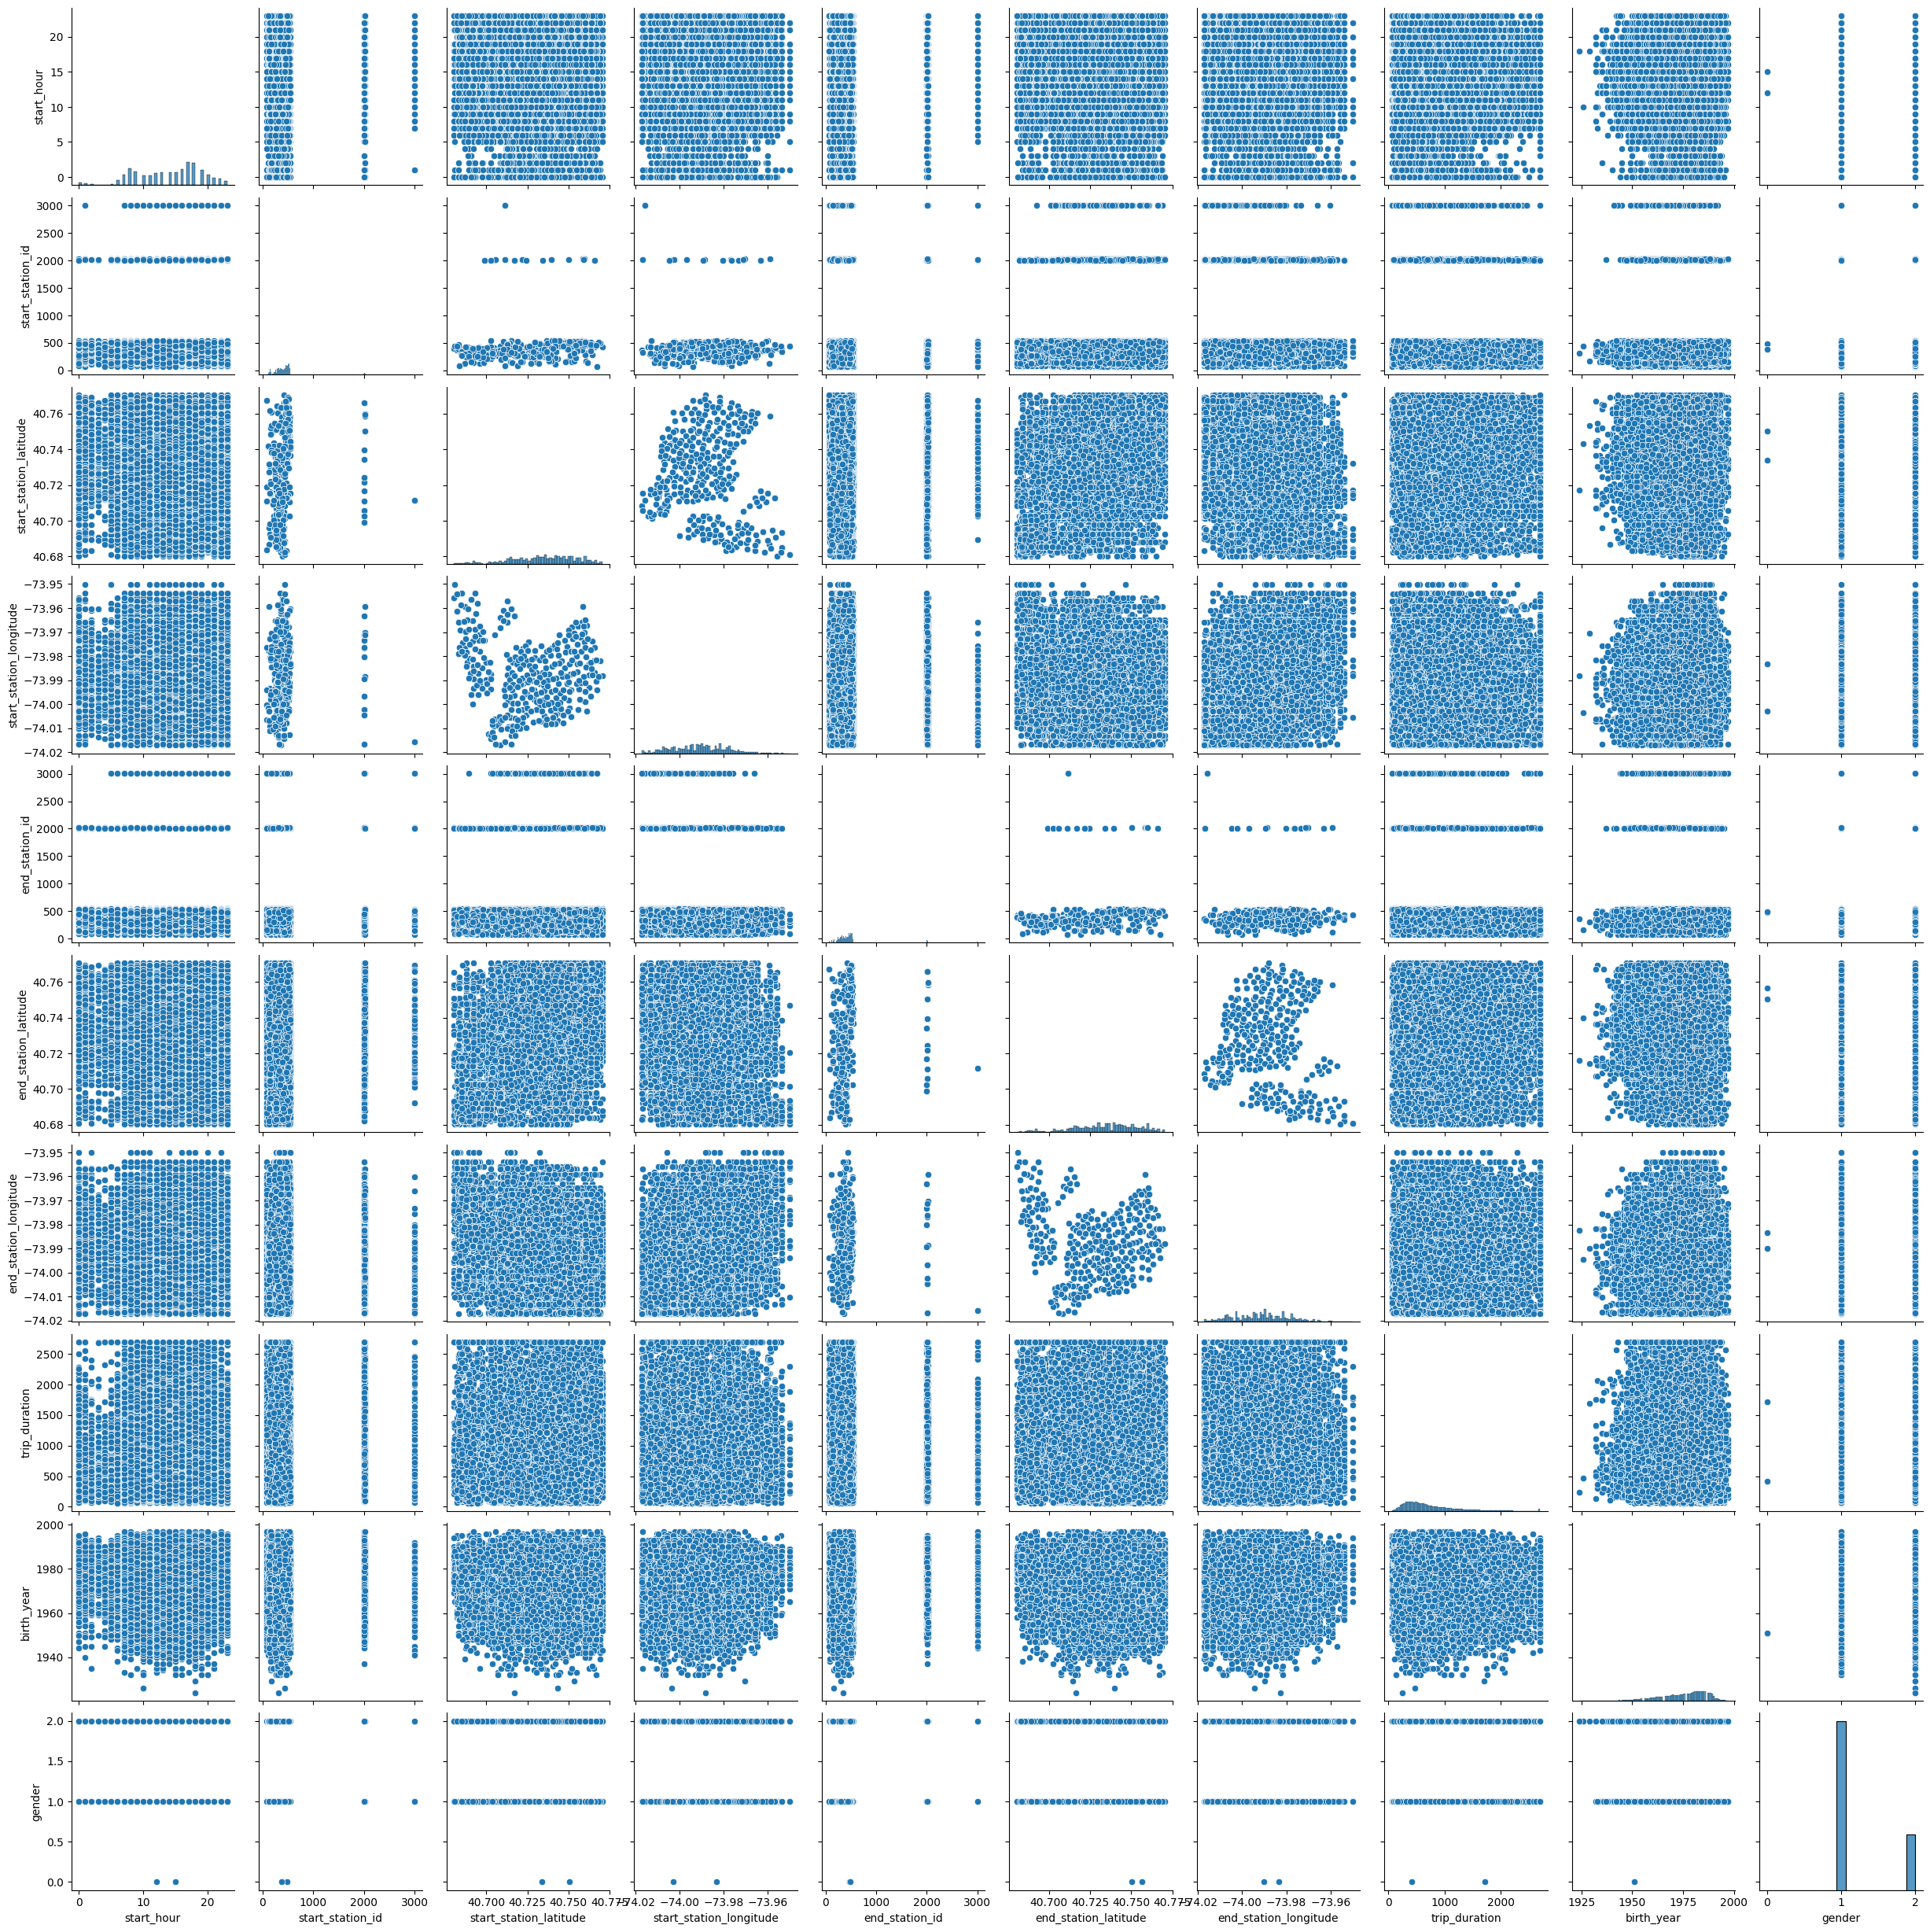

In [40]:
# create a pair plot of the entire data set
g=sns.pairplot(citi)

In [41]:
# i would like to pair this down so i can read it
sub=citi[['start_hour','start_station_id','end_station_id','trip_duration','birth_year','gender']]

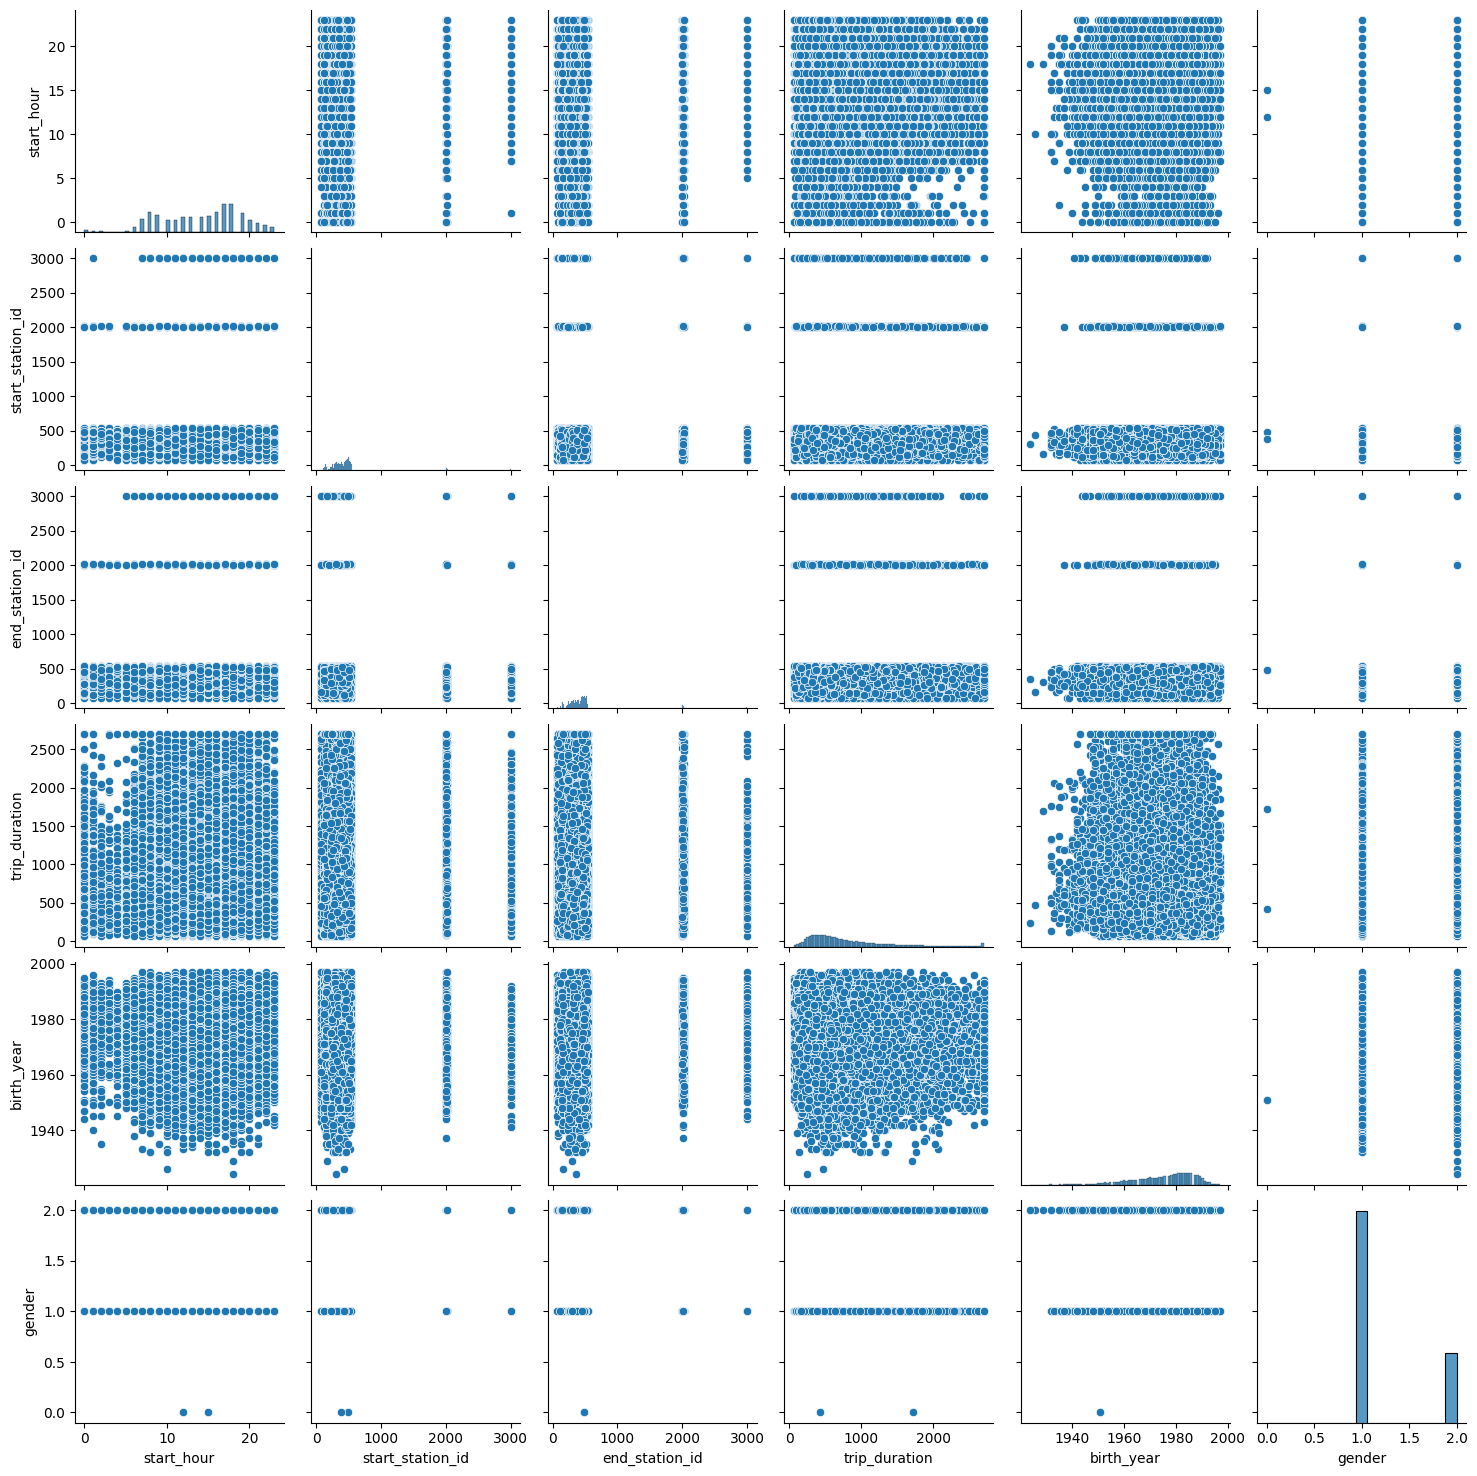

In [42]:
# create a pair plot of selected variables
g=sns.pairplot(sub)

# distibution of variables comments
Nothing here really drives me to explore further, It is making me start to feel like i should convert the days of the week to a numerical value 

<Axes: xlabel='start_hour', ylabel='Count'>

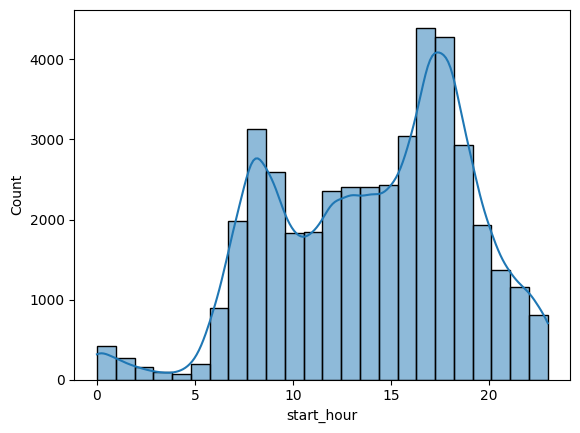

In [43]:
# creating a categorical variable that splits the start hour column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['start_hour'], bins =24, kde= True)

In [44]:
# not many people ride citi bike until about 7 am there is a jump and then the most people ride citi bike at 9am and 6 and 7 pm 

<Axes: xlabel='trip_duration', ylabel='Count'>

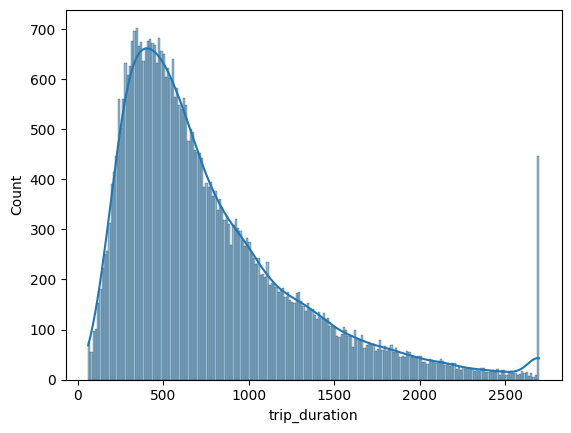

In [45]:
# creating a categorical variable that splits the trip duration column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['trip_duration'], bins =200, kde= True)

In [46]:
# most people ride citi bikes for 250-600 seconds (4-10 minutes)

<Axes: xlabel='birth_year', ylabel='Count'>

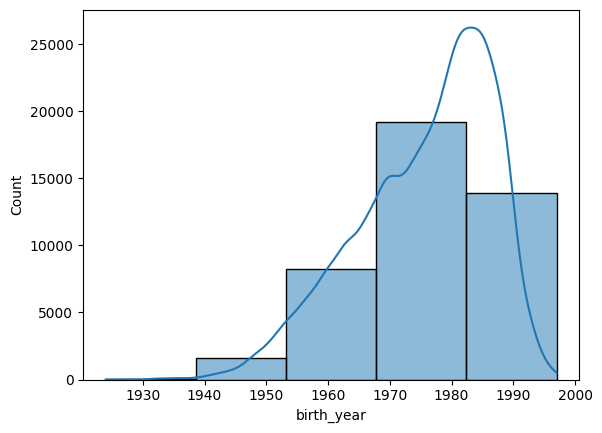

In [47]:
# creating a categorical variable that splits the trip duration column into categories
#use histo to visualize distrobution of variables
sns.histplot(citi['birth_year'], bins =5, kde= True)

In [48]:
#most riders were born between 1970 and 1980

In [49]:
# making categories for trip duration
citi.loc[citi['trip_duration'] < 600, 'Trip category'] = 'under 10 minutes'

In [50]:
citi.loc[(citi['trip_duration'] >= 600) & (citi['trip_duration']<1200), 'Trip category'] = '10-20 minutes'

In [51]:
citi.loc[citi['trip_duration'] >= 1200, 'Trip category'] = 'over 20 minutes'

In [52]:
citi['Trip category'].value_counts(dropna = False)

Trip category
under 10 minutes    20612
10-20 minutes       14881
over 20 minutes      7500
Name: count, dtype: int64

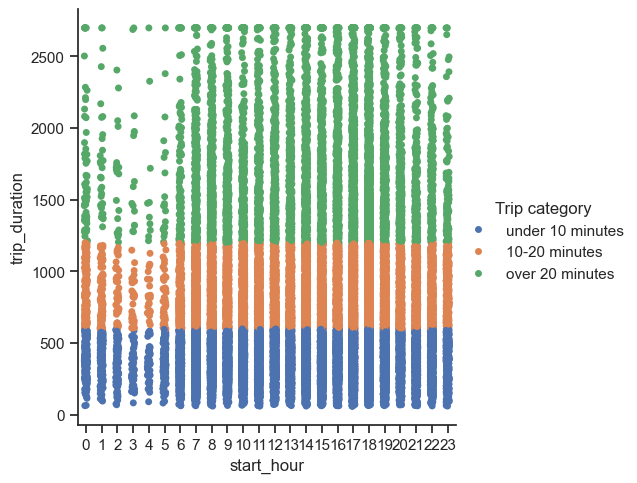

In [53]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="start_hour", y= "trip_duration", hue="Trip category", data=citi)

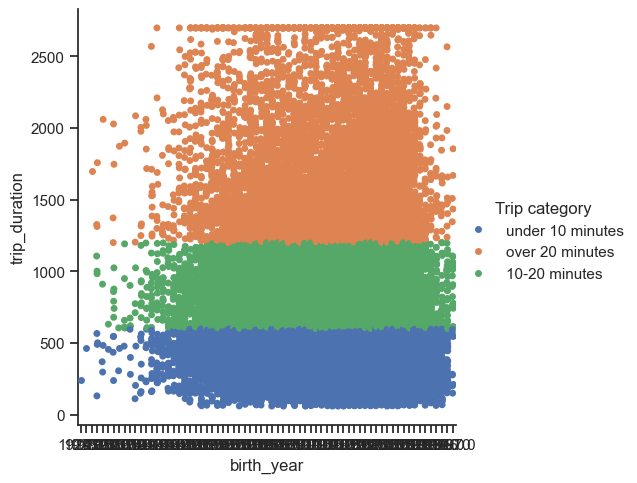

In [54]:
# create categorical plotin seaborn using trip category
sns.set(style="ticks")
g=sns.catplot(x="birth_year", y= "trip_duration", hue="Trip category", data=citi)

# questions I can answer from research i have done so far
- what day is the busiest day for citi bike? 
Monday and then Friday from doing a counts

# what time of day do people use citi bike the most and least? does it vary on day of week?
most 9 am and 6-7 pm least 1-5 am - havent discovered if day of week matters yet based on analysis done so far

# what age group uses citi bike the most? least?
most 30-40 year olds (born bt 1970 and 1980 in 2013) least 60 and older born 1950 and earlier in 2013

# I felt like these were the quetions I could answer based on what was asked of me this task

From here i definetely want to figure out how to see how many bikes were used in a day,week and hour. I feel like there is a way to do a correlation heatmap of the day with the hour bikes are used as well as the whole week and hour bikes are used. this could answer the last part of my 2nd question

I also want to figure out how many bikes were used at each station 

# saving and exporting

In [56]:

citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_3.csv'))